LR is used for binary classification using a probability threshold;
It estimatates probabilities similar to linear regression by computing weighted sum of input features.
It estimates probabilities different from linear regression as the outputs are logistic of the results instead of the results.

LR model estimates the proability p to make prediction y:


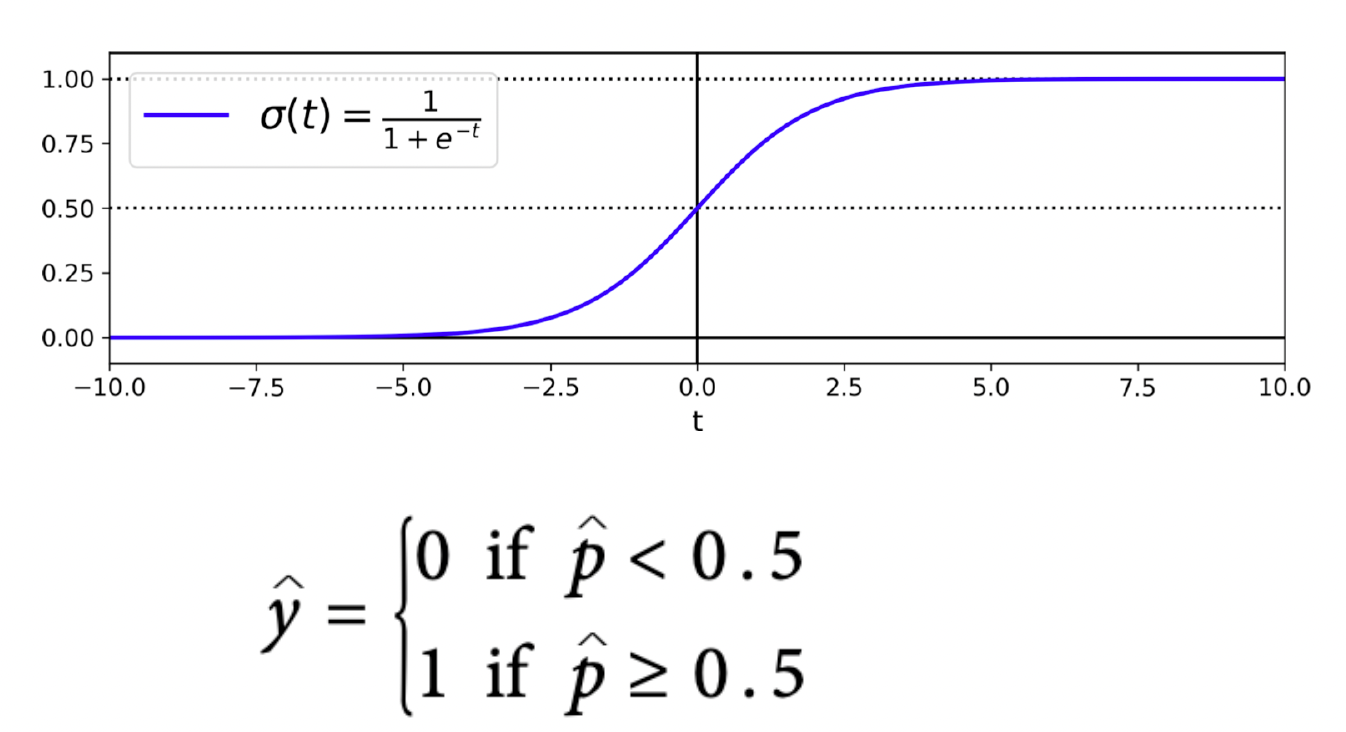

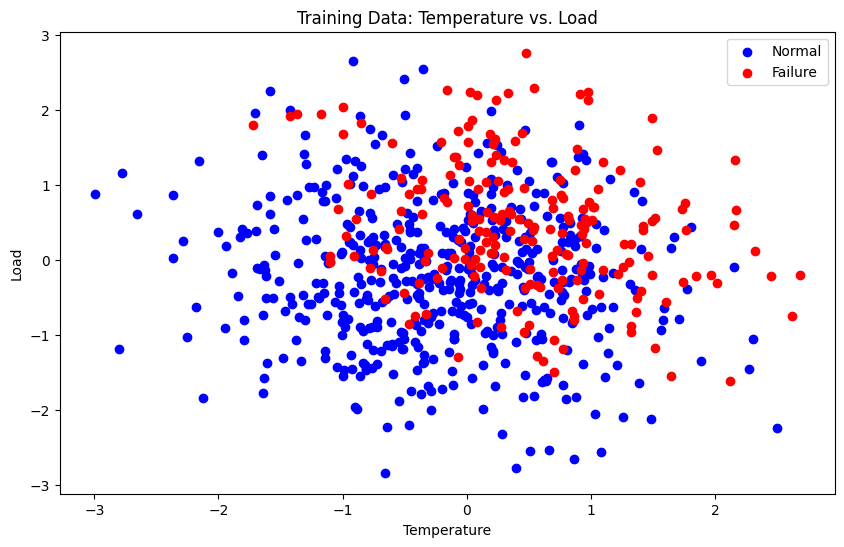

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_curve, auc

# Simulate data
np.random.seed(0)
data_size = 1000
features = np.random.normal(0, 1, (data_size, 2))
labels = np.random.binomial(1, p=1 / (1 + np.exp(-(features[:, 0] + features[:, 1] - 1))), size=data_size)

# Create DataFrame
df = pd.DataFrame(features, columns=['Temperature', 'Load'])
df['Failure'] = labels

# Split data
X_train, X_test, y_train, y_test = train_test_split(df[['Temperature', 'Load']], df['Failure'], test_size=0.3, random_state=42)

# Plot data
plt.figure(figsize=(10, 6))
plt.scatter(X_train[y_train == 0]['Temperature'], X_train[y_train == 0]['Load'], color='blue', label='Normal')
plt.scatter(X_train[y_train == 1]['Temperature'], X_train[y_train == 1]['Load'], color='red', label='Failure')
plt.title('Training Data: Temperature vs. Load')
plt.xlabel('Temperature')
plt.ylabel('Load')
plt.legend()
plt.show()

              precision    recall  f1-score   support

           0       0.78      0.89      0.83       198
           1       0.71      0.50      0.59       102

    accuracy                           0.76       300
   macro avg       0.74      0.70      0.71       300
weighted avg       0.75      0.76      0.75       300



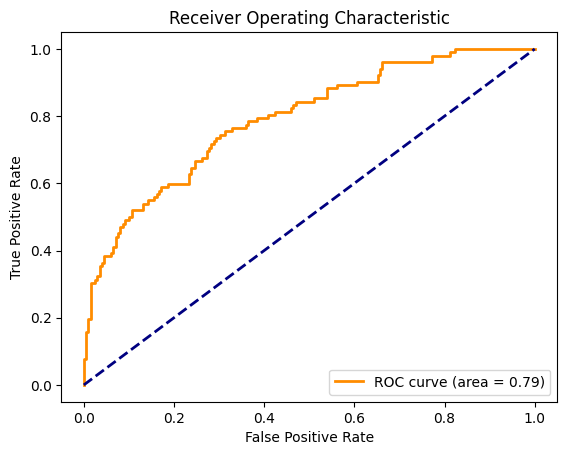

In [ ]:
# Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
probabilities = model.predict_proba(X_test)[:, 1]

# Evaluation
print(classification_report(y_test, predictions))
fpr, tpr, _ = roc_curve(y_test, probabilities)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Gaussian Naive Bayes Model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_predictions = nb_model.predict(X_test)
nb_probabilities = nb_model.predict_proba(X_test)[:, 1]

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# Metrics for Logistic Regression
lr_cm = confusion_matrix(y_test, predictions)
lr_precision = precision_score(y_test, predictions)
lr_recall = recall_score(y_test, predictions)
lr_f1 = f1_score(y_test, predictions)

# Metrics for Naive Bayes
nb_cm = confusion_matrix(y_test, nb_predictions)
nb_precision = precision_score(y_test, nb_predictions)
nb_recall = recall_score(y_test, nb_predictions)
nb_f1 = f1_score(y_test, nb_predictions)

print("Logistic Regression - Confusion Matrix:\n", lr_cm)
print("Naive Bayes - Confusion Matrix:\n", nb_cm)
print("Logistic Regression - Precision: {:.2f}, Recall: {:.2f}, F1-Score: {:.2f}".format(lr_precision, lr_recall, lr_f1))
print("Naive Bayes - Precision: {:.2f}, Recall: {:.2f}, F1-Score: {:.2f}".format(nb_precision, nb_recall, nb_f1))

Logistic Regression - Confusion Matrix:
 [[177  21]
 [ 51  51]]
Naive Bayes - Confusion Matrix:
 [[180  18]
 [ 53  49]]
Logistic Regression - Precision: 0.71, Recall: 0.50, F1-Score: 0.59
Naive Bayes - Precision: 0.73, Recall: 0.48, F1-Score: 0.58
